In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
import sklearn
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('data.csv', encoding='latin-1')
df.head()

,Sentiment,User_ID,Time_uploaded,User_name,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Sentiment      1048575 non-null  int64 
 1   User_ID        1048575 non-null  int64 
 2   Time_uploaded  1048575 non-null  object
 3   User_name      1048575 non-null  object
 4   Tweet          1048575 non-null  object
dtypes: int64(2), object(3)
memory usage: 40.0+ MB


In [5]:
df1 = df.drop(['Time_uploaded','User_ID','User_name'],axis=1)

In [6]:
df1.head()

,Sentiment,Tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [8]:
df1['clean_tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")

In [9]:
df1

,Sentiment,Tweet,clean_tweet
0,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,0,@Kwesidei not the whole crew,not the whole crew
...,...,...,...
1048570,4,My GrandMa is making Dinenr with my Mum,My GrandMa is making Dinenr with my Mum
1048571,4,Mid-morning snack time... A bowl of cheese noo...,Mid-morning snack time... A bowl of cheese noo...
1048572,4,@ShaDeLa same here say it like from the Termi...,same here say it like from the Terminiator m...
1048573,4,@DestinyHope92 im great thaanks wbuu?,im great thaanks wbuu?


In [10]:
df1['clean_tweet'] = df1['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df1.head()

,Sentiment,Tweet,clean_tweet
0,0,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to s...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am...
4,0,@Kwesidei not the whole crew,not the whole crew


In [11]:
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df1.head()

,Sentiment,Tweet,clean_tweet
0,0,is upset that he can't update his Facebook by ...,upset that update Facebook texting might resul...
1,0,@Kenichan I dived many times for the ball. Man...,dived many times ball Managed save rest bounds
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",behaving here because over there
4,0,@Kwesidei not the whole crew,whole crew


In [12]:
tokenized_tweet = df1['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [upset, that, update, Facebook, texting, might...
1    [dived, many, times, ball, Managed, save, rest...
2              [whole, body, feels, itchy, like, fire]
3               [behaving, here, because, over, there]
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [13]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [upset, that, updat, facebook, text, might, re...
1    [dive, mani, time, ball, manag, save, rest, bo...
2               [whole, bodi, feel, itchi, like, fire]
3                   [behav, here, becaus, over, there]
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df1['clean_tweet'] = tokenized_tweet
df1.head()

,Sentiment,Tweet,clean_tweet
0,0,is upset that he can't update his Facebook by ...,upset that updat facebook text might result sc...
1,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest bound
2,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,0,"@nationwideclass no, it's not behaving at all....",behav here becaus over there
4,0,@Kwesidei not the whole crew,whole crew


In [15]:
pip install wordcloud

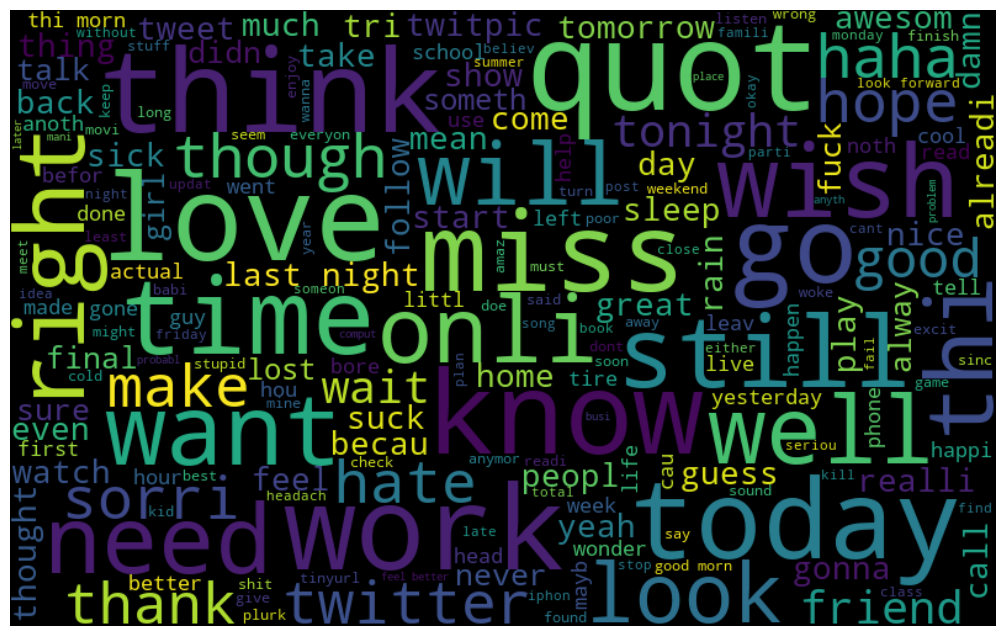

In [16]:
all_words = " ".join([sentence for sentence in df1['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

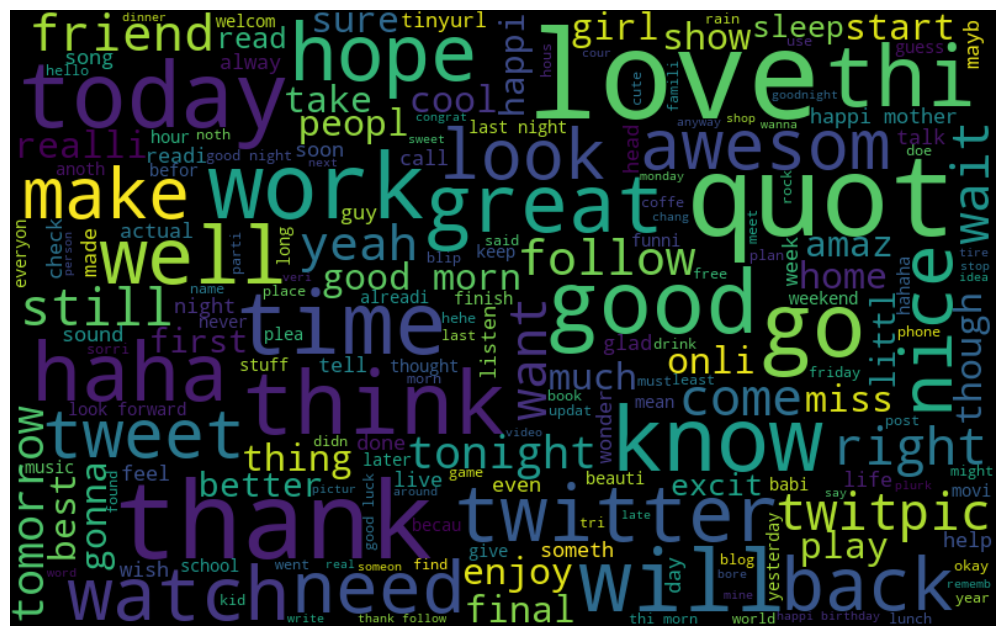

In [17]:
all_words = " ".join([sentence for sentence in df1['clean_tweet'][df1['Sentiment']==4]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

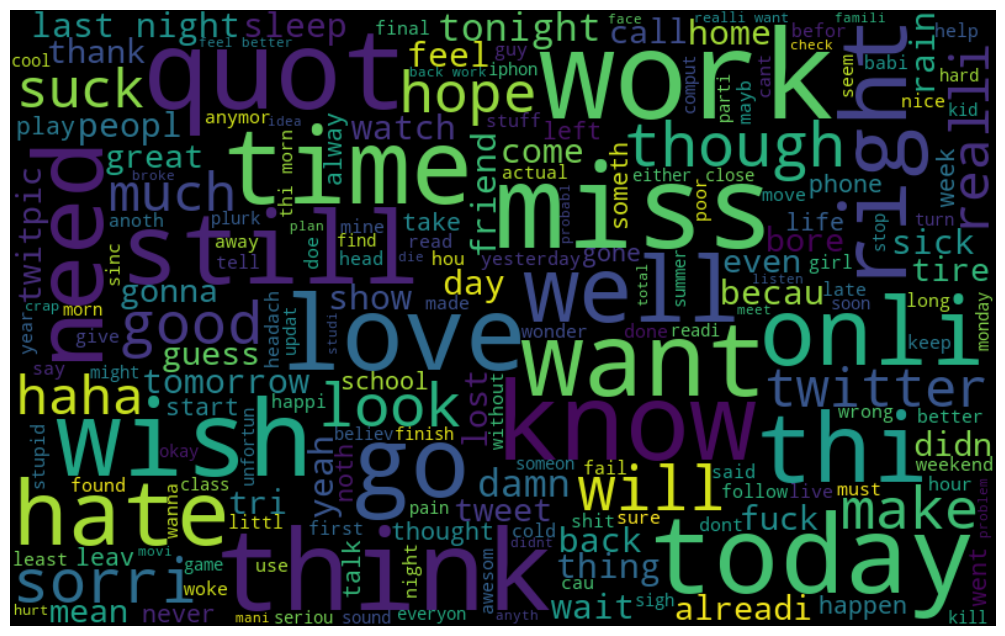

In [18]:
all_words = " ".join([sentence for sentence in df1['clean_tweet'][df1['Sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags   

In [70]:
ht_positive = hashtag_extract(df1['clean_tweet'][df1['Sentiment']==4])

ht_negative = hashtag_extract(df1['clean_tweet'][df1['Sentiment']==0])

In [71]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [72]:
ht_negative[:5]

['itm', 'therapyfail', 'ttsc', 'gayforpeavi', 'fml']

In [73]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,devun,1
1,alexa,1
2,japan,3
3,skype,2
4,explet,1


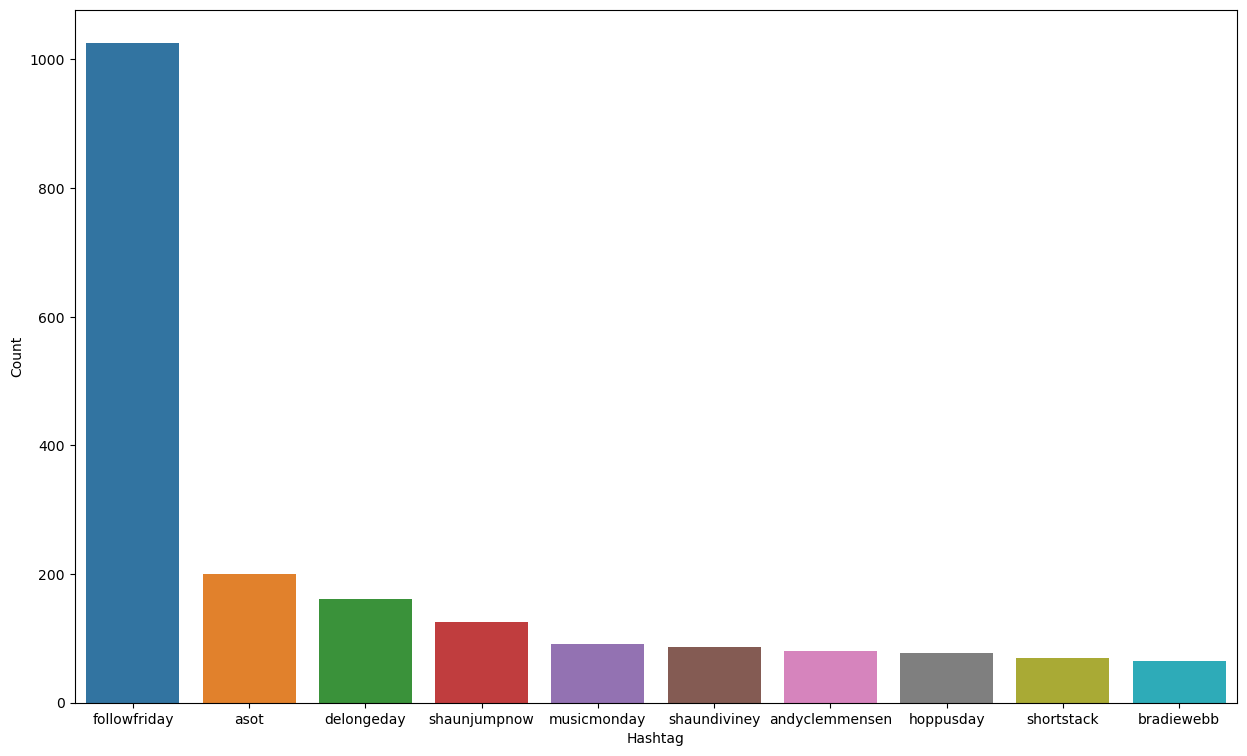

In [74]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [75]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,ttsc,1
3,gayforpeavi,1
4,fml,24


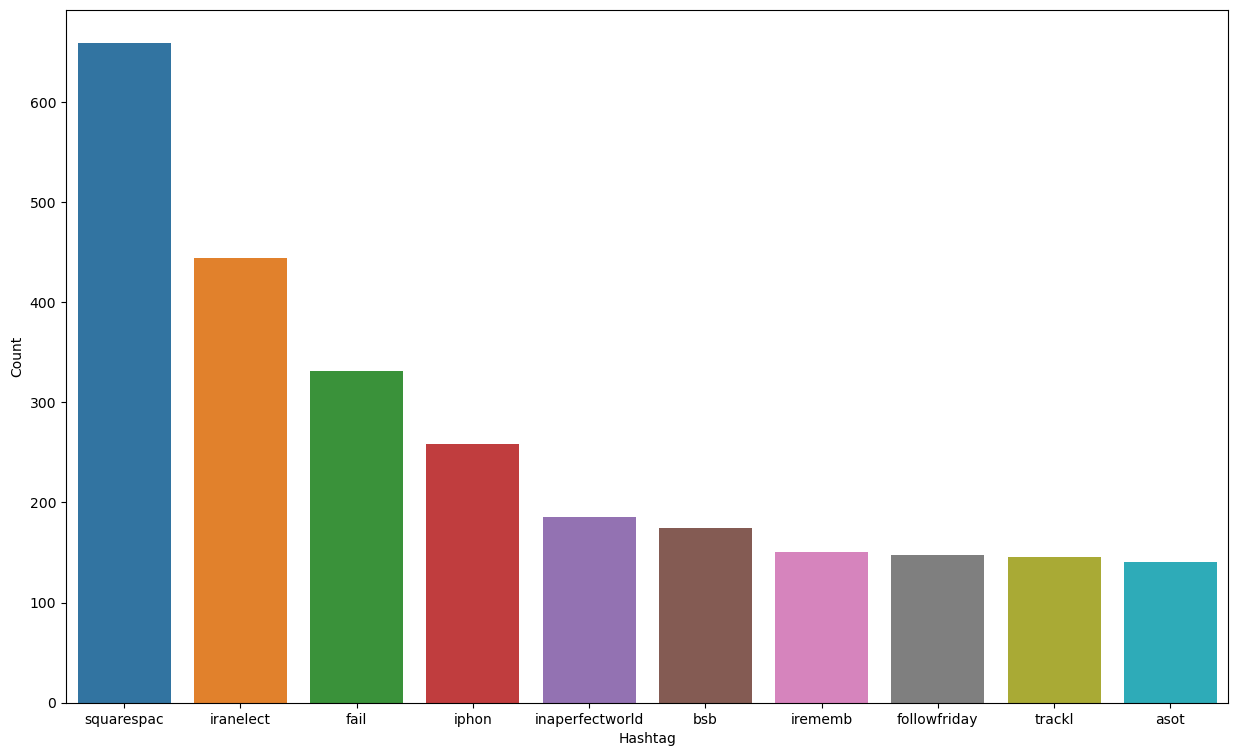

In [76]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=.09, min_df=1, max_features=100000, stop_words='english')
bow = bow_vectorizer.fit_transform(df1['clean_tweet'])

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df1['Sentiment'], random_state=42, test_size=0.25)

In [141]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(786431, 100000) (262144, 100000) (786431,) (262144,)


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [143]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [144]:
pred = model.predict(x_test)
f1_score(y_test, pred,pos_label=4,average=None)

array([0.8875395 , 0.51833416])

In [145]:
accuracy_score(y_test,pred)

0.8176536560058594

In [146]:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 1
pred = pred.astype(np.int64)

f1_score(y_test, pred,pos_label=4,average=None)

array([0.86559, 0.     ])

In [147]:
accuracy_score(y_test,pred)

0.763031005859375

In [148]:
import pickle

In [149]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [150]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [151]:
X_new = x_test[200]
print(X_new)

  (0, 27706)	1
  (0, 33954)	1
  (0, 67124)	1
  (0, 1957)	1
  (0, 42960)	1
  (0, 58890)	1
  (0, 14838)	1
  (0, 23407)	1
  (0, 21537)	1
  (0, 37062)	1


In [160]:
X_new = x_test
print(X_new[2000])

prediction = loaded_model.predict(X_new)
print(prediction)

if prediction[0]==0:
    print("negative")
elif preditction[0]==4:
    print("positive")
else:
    print("neutral")

  (0, 79654)	1
  (0, 23192)	1
  (0, 34397)	1
  (0, 94108)	1
  (0, 83890)	1
  (0, 49090)	1
  (0, 51865)	1
  (0, 32245)	1
  (0, 31927)	1
[0 0 4 ... 0 4 0]
negative
